# How much do Swatch watches cost?

In [1]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Webscraping

In [2]:
#Urls of the relevant webpages
urls = ['https://shop.swatch.com/en_ca/catalogsearch/result/?q=women',
        'https://shop.swatch.com/en_ca/catalogsearch/result?p=2&q=women',
        'https://shop.swatch.com/en_ca/catalogsearch/result?p=3&q=women']

#Dictionary with the name, price, strap material
#colour and function of each product

watches_dict = {'name': [], 'price': [], 'strap_material': [], 'colour': [], 'function': []}


for index, url in enumerate(urls):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    watches = soup.find_all('li', class_ = 'item')
    
    #Search patterns for the colour, strap material and function 
    colour_pattern = r"'item_color'\:\s+'(\w+)(\s?)(\w+)'"
    strap_material_pattern = r"'strap_material'\:\s+'(\w+)(\.*)(\s*)(\w*)(\s*)(\w*)(/*)(-*)(\w*)(\s*)(\w*)'"
    function_pattern = r"'item_function'\:\s+'(\w+)(,*)(\w*)(-*)(\w*)(,*)(\w*)(,*)(\w*)(\s?)(\w*)(\w*)(,*)(\w*)(/*)(-*)(\w*)(\s*)(\w*)'"
    
    #The first two webpages contain the relevant information 
    #from the 31st index to the 54th index
    if index < 2:
        for number in range(31, 55):
            
            
            #Name of the watch 
            name = watches[number].find('a', class_ = 'product-image')['title']
            watches_dict['name'].append(name)
            
            #Price of the watch 
            price = watches[number].find('span',class_ = 'price').text
            watches_dict['price'].append(price)
            
            #Javascript text that contains the strap material,
            #colour and function of the watch 
            java_script_text = watches[number].find('script', {'type': 'text/javascript'}).string
            
            #Strap material of the watch 
            if bool(re.search(strap_material_pattern, java_script_text)) == False:
                watches_dict['strap_material'].append(np.nan)
            else:
                strap_text_match = re.search(strap_material_pattern, java_script_text)
                strap_material = strap_text_match.group(0)
                watches_dict['strap_material'].append(strap_material)
              
            #Colour of the watch 
            if bool(re.search(colour_pattern, java_script_text)) == False:
                watches_dict['colour'].append(np.nan)
            else:
                colour_text_match = re.search(colour_pattern, java_script_text)
                colour = colour_text_match.group(0)
                watches_dict['colour'].append(colour)
            
            #Function of the watch
            if bool(re.search(function_pattern, java_script_text)) ==  False:
                watches_dict['function'].append(np.nan)
            else:
                function_text_match = re.search(function_pattern, java_script_text)
                function = function_text_match.group(0)
                watches_dict['function'].append(function)
     
    else:
        
        #The last webpage has fewer products than the first page
        #indexing is only necessary for a smaller range
        for number in range(31, 47):
            
            #Name of the watch 
            name = watches[number].find('a', class_ = 'product-image')['title']
            price = watches[number].find('span',class_ = 'price').text
            
            #Price of the watch
            watches_dict['name'].append(name)
            watches_dict['price'].append(price)
            
            #Javascript text that contains the strap material,
            #colour and function of the watch 
            java_script_text = watches[number].find('script', {'type': 'text/javascript'}).string
            
            #Strap material of the watch 
            if bool(re.search(strap_material_pattern, java_script_text)) == False:
                watches_dict['strap_material'].append(np.nan)
            else:
                strap_text_match = re.search(strap_material_pattern, java_script_text)
                strap_material = strap_text_match.group(0)
                watches_dict['strap_material'].append(strap_material)
            
            #Colour of the watch 
            if bool(re.search(colour_pattern, java_script_text)) == False:
                watches_dict['colour'].append(np.nan)
            else:
                colour_text_match = re.search(colour_pattern, java_script_text)
                colour = colour_text_match.group(0)
                watches_dict['colour'].append(colour)
            
            #Function of the watch
            if bool(re.search(function_pattern, java_script_text)) ==  False:
                watches_dict['function'].append(np.nan)
            else:
                function_text_match = re.search(function_pattern, java_script_text)
                function = function_text_match.group(0)
                watches_dict['function'].append(function)

In [3]:
#Dataframe of the watches
df = pd.DataFrame.from_dict(watches_dict)

## Data cleaning

In [4]:
#Adding the date the data was scraped
df['date_scraped'] = dt.date.today()

In [5]:
#First five rows of the dataframe
df.head()

,name,price,strap_material,colour,function,date_scraped
0,SPARKLINGOT,$95.00,'strap_material': 'Silicone','item_color': 'Transparent','item_function': 'Water-resistance',2021-01-24
1,#OPENSUMMER,$110.00,'strap_material': 'Silicone','item_color': 'Transparent','item_function': 'Water-resistance',2021-01-24
2,SIDERAL BLUE,$95.00,'strap_material': 'Silicone','item_color': 'Blue','item_function': 'Water-resistance',2021-01-24
3,SIDERAL GREY,$130.00,'strap_material': 'Synthetic/Leather','item_color': 'Grey','item_function': 'Water-resistance',2021-01-24
4,LOST MOON,$130.00,'strap_material': 'Synthetic/Leather','item_color': 'Black','item_function': 'Water-resistance',2021-01-24


In [6]:
#Rows and columns of the dataframe
df.shape

(64, 6)

In [7]:
#Changing the name of the product to titlecase
df['name'] = df.name.str.title()

In [8]:
#Removing the "$" from the product and converting it to a float
df['price'] = df.price.str.strip('$').astype('float')

In [9]:
#Cleaning the strap material column 
df['strap_material'] = df.strap_material.str.replace("'strap_material':", '').str.strip().str.replace("'", '')

In [10]:
#Cleaning the item function column
df['function'] = df.function.str.replace("'item_function':", '').str.replace("'", '').str.strip()

In [11]:
#CLeaning the colour column
df['colour'] = df.colour.str.replace("'item_color':", '').str.replace("'", '').str.strip()

In [12]:
#Checking the types of strap material 
df.strap_material.value_counts()

Silicone                39
Bio-sourced material    14
Synthetic/Leather        5
St. Steel Adjustable     3
Rubber                   2
Name: strap_material, dtype: int64

In [13]:
#Checking for rows with missing strap material
df[df.strap_material.isnull()]

,name,price,strap_material,colour,function,date_scraped
62,Luminescent Rose,180.0,NaN,Pink,Water-resistance,2021-01-24


In [14]:
#Entering the strap material of the Luminescent Rose watch
df.iloc[62,2] = 'St. Steel (milanese)'

In [15]:
#Checking for watches with a missing function
df[df.function.isnull()]

,name,price,strap_material,colour,function,date_scraped
26,Greytralize,225.0,St. Steel Adjustable,Grey,NaN,2021-01-24
33,Bbbubbles,135.0,Silicone,Green,NaN,2021-01-24
34,Bbbeauty,135.0,Silicone,Grey,NaN,2021-01-24
35,Bbblood,135.0,Silicone,Black,NaN,2021-01-24
36,Bbblue,135.0,Silicone,Black,NaN,2021-01-24
37,Bbblack,135.0,Silicone,Black,NaN,2021-01-24
38,Bbblanco,135.0,Silicone,Green,NaN,2021-01-24
39,Bbneon,135.0,Silicone,Blue,NaN,2021-01-24
40,Bbcandy,135.0,Silicone,Blue,NaN,2021-01-24
41,Bbnavy,135.0,Silicone,Blue,NaN,2021-01-24


Some of the watches did not have any information for the function, so those rows have missing values.

In [16]:
#Checking the function values
df.function.value_counts()

Water-resistance                        36
Water-resistance,Daydate                 6
Glowing,Water-resistance,Chrono,Date     3
Watch Typo,Water-resistance              2
Automatic,Water-resistance               2
Water-resistance,Chrono,Date,Glowing     1
Watch Illustration                       1
Glowing,Water-resistance                 1
Name: function, dtype: int64

In [17]:
#Creating a binary column for whether or not 
#a watch is water resistant
df.loc[df.function.str.lower().str.contains('water-resistance', na = False), 'water_resistant'] = 1
df.loc[~df.function.str.lower().str.contains('water-resistance', na = False), 'water_resistant'] = 0

In [18]:
#Creating a binary column for whether or not 
#a watch has a date
df.loc[df.function.str.lower().str.contains('date', na = False), 'date_function'] = 1
df.loc[~df.function.str.lower().str.contains('date', na = False), 'date_function'] =  0 

In [19]:
#Creating a binary column for whether or not 
#a watch has a day and a date function
df.loc[df.function.str.lower().str.contains('day', na = False), 'day_date'] = 1
df.loc[~df.function.str.lower().str.contains('day', na = False), 'day_date'] =  0 

In [20]:
#Creating a binary column for 
#whether or not watch glows in the dark
df.loc[df.function.str.lower().str.contains('glowing', na = False), 'glowing'] = 1
df.loc[~df.function.str.lower().str.contains('glowing', na = False), 'glowing'] =  0 

In [21]:
#Creating a binary column for 
#whether or not a watch is chronograph
df.loc[df.function.str.lower().str.contains('chrono', na = False), 'chrono'] = 1
df.loc[~df.function.str.lower().str.contains('chrono', na = False), 'chrono'] =  0 

In [22]:
#First five rows of the cleaned dataframe
df.head()

,name,price,strap_material,colour,function,date_scraped,water_resistant,date_function,day_date,glowing,chrono
0,Sparklingot,95.0,Silicone,Transparent,Water-resistance,2021-01-24,1.0,0.0,0.0,0.0,0.0
1,#Opensummer,110.0,Silicone,Transparent,Water-resistance,2021-01-24,1.0,0.0,0.0,0.0,0.0
2,Sideral Blue,95.0,Silicone,Blue,Water-resistance,2021-01-24,1.0,0.0,0.0,0.0,0.0
3,Sideral Grey,130.0,Synthetic/Leather,Grey,Water-resistance,2021-01-24,1.0,0.0,0.0,0.0,0.0
4,Lost Moon,130.0,Synthetic/Leather,Black,Water-resistance,2021-01-24,1.0,0.0,0.0,0.0,0.0


In [23]:
#Checking the datatypes of the cleaned dataframe
df.dtypes

name                object
price              float64
strap_material      object
colour              object
function            object
date_scraped        object
water_resistant    float64
date_function      float64
day_date           float64
glowing            float64
chrono             float64
dtype: object

## Exploratory data analysis

### ***What is the average price of the watches?***

In [24]:
avg_price = df.price.mean()
rounded_avg_price = round(avg_price,2)
print(f'${rounded_avg_price}')

$132.81


### ***What is the lowest price of the watches?***

In [25]:
min_price = df.price.min()
print(f'${min_price}')

$85.0


### ***What is the highest price of the watches?***

In [26]:
max_price = df.price.max()
print(f'${max_price}')

$285.0


### ***How many watches cost above the average price of the watches?***

In [27]:
df[df.price > avg_price].shape[0]

34

### ***How many watches cost below the average price of the watches?***

In [28]:
df[df.price < avg_price].shape[0]

30

### ***What is the distribution of prices?***

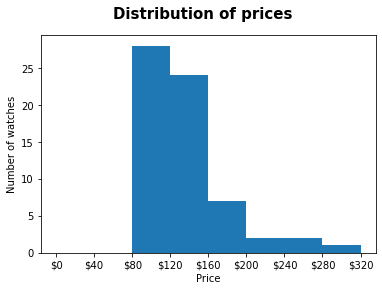

In [29]:
fig, ax = plt.subplots()
price_bins = [i for i in range(0, int(max_price) + 40 , 40)]
ax.hist(df.price, bins = price_bins)
ax.set_xlabel('Price')
ax.set_ylabel('Number of watches')
ax.set_xticks(price_bins)

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(formatter)

fig.suptitle('Distribution of prices', fontsize = 15, fontweight = 'bold')
plt.show()

### ***What are the five most expensive and the cheapest watches?***

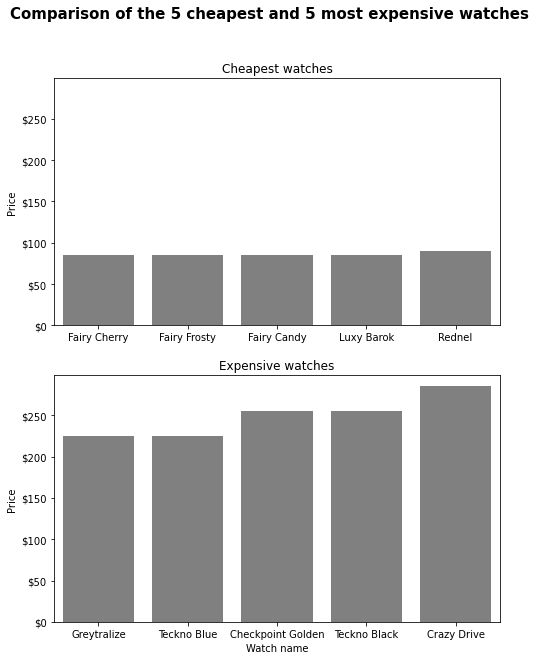

In [30]:
#Dataframe of the watches sorted by price
sorted_prices = df.sort_values('price', ascending = True)

#5 most expensive watches
top_5 = sorted_prices.head()

#5 cheapest watches
bottom_5 = sorted_prices.tail()

fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (8,10))
sns.barplot(x = 'name', y = 'price', data = top_5, color = 'grey', ax = ax1)
sns.barplot(x = 'name', y = 'price', data = bottom_5, color = 'grey', ax = ax2)

#ax1.set_xlabel('Watch name')
#ax2.set_xlabel('')
ax1.set_title('Cheapest watches')
ax1.set_ylabel('Price')
ax1.set_xlabel('')

ax2.set_ylabel('Price')
ax2.set_xlabel('Watch name') 
ax2.set_title('Expensive watches')


formatter = ticker.FormatStrFormatter('$%1.0f')
ax1.yaxis.set_major_formatter(formatter)

fig.suptitle('Comparison of the 5 cheapest and 5 most expensive watches', fontsize = 15, fontweight = 'bold')

plt.show()

#### Information about the cheapest and the most expensive watches

In [31]:
df.loc[(df.name.str.lower().str.contains('fairy')) | (df.price == 285), 'name': 'function' ]

,name,price,strap_material,colour,function
58,Fairy Candy,85.0,Silicone,Pink,Water-resistance
59,Fairy Frosty,85.0,Silicone,Blue,Water-resistance
60,Fairy Cherry,85.0,Silicone,Pink,Water-resistance
63,Crazy Drive,285.0,St. Steel Adjustable,Grey,"Glowing,Water-resistance,Chrono,Date"


The Crazy Drive watch has more functions than the Fairy watches. This shows that there may be a relationship between the functions available and the price of the watch. 

### ***Do different types of strap materials have different prices?***

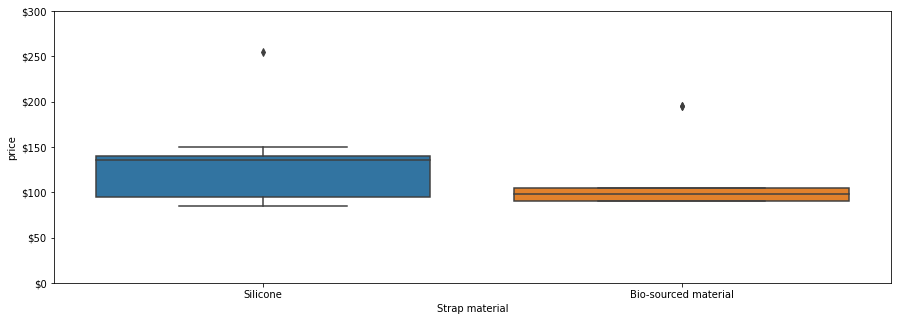

In [32]:
strap_mat_list = df.strap_material.value_counts().head(2).index.to_list()
strap_df  = df.loc[df.strap_material.isin(strap_mat_list)]
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x = 'strap_material', y = 'price',  data = strap_df)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Strap material')
ax.set_ylim(0,300)
plt.show()

In the chart above, only the Silicone and Bio-sourced materials are used for the boxplots because they have ten or more products. Watches with bio-sourced strap material have the smallest range of prices. However, there are only 14 watches with this strap material, compared to the 35 silicone strap material watches.

### ***How many different colours are available?***

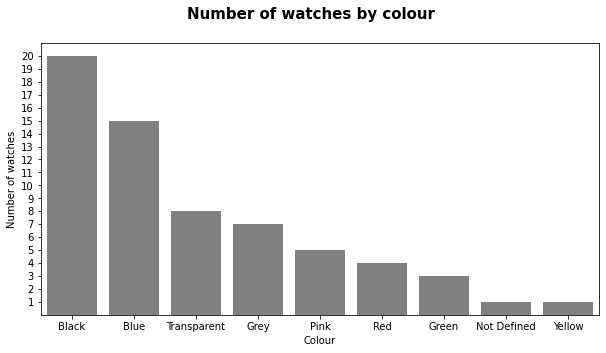

In [33]:
colours_group = df.groupby('colour', as_index = False)[['name']].count()
colours_group.rename(columns = {'name': 'total'}, inplace = True)
colours_group.sort_values('total', ascending = False, inplace = True)

colours = colours_group.colour.str.lower().unique().tolist()

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x= 'colour', y = 'total', data = colours_group, color = 'grey', ax = ax)
ax.set_ylabel('Number of watches')
ax.set_xlabel('Colour')
fig.suptitle('Number of watches by colour', fontsize = 15, fontweight = 'bold')
yticks = [i for i in range(1,21)]
ax.set_yticks(yticks)
plt.show()

### ***How many watches have each functions?***

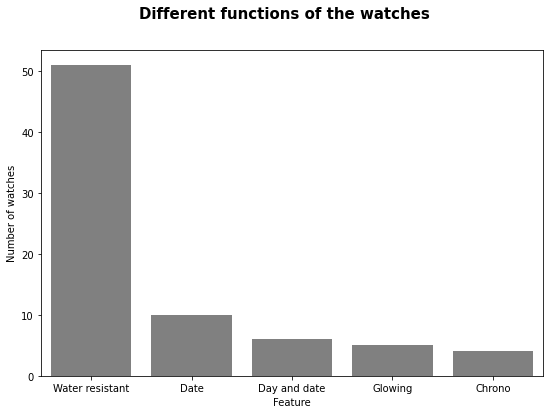

In [34]:
features_columns = ['water_resistant', 'date_function', 'day_date', 'glowing', 'chrono']
features_count = df[features_columns].sum()
features_count = pd.DataFrame(features_count)
features_count.reset_index(inplace = True)
features_count.rename(columns = {'index': 'feature', 0:'num_watches'}, inplace = True)

mapping = {'water_resistant':'Water resistant', 'date_function': 'Date', 'day_date':'Day and date', 
 'glowing':'Glowing', 'chrono':'Chrono'}

features_count['feature'] = features_count.feature.map(mapping)

fig, ax = plt.subplots(figsize = (9,6))
sns.barplot(x = features_count.feature, y = features_count.num_watches, data = features_count, color = 'grey', ax = ax)
ax.set_ylabel('Number of watches')
ax.set_xlabel('Feature')
fig.suptitle('Different functions of the watches', fontsize = 15, fontweight = 'bold')
plt.show()

### ***If I wanted to buy a watch with the day and the date, how much would it cost on average?***

In [35]:
mean_price = df.loc[df.day_date == 1, 'price'].mean()
print(f'${mean_price}')

$105.0


### ***Which black, day and date watches can I buy?***

In [36]:
df.loc[(df.day_date == 1) & (df.colour == 'Black'), ['name','price', 'colour']]

,name,price,colour
14,Neuzeit,105.0,Black
28,Black Rails,105.0,Black
